# Clasificador paisajes
Para este ejercicio vas a crear un clasificador automático de paisajes. Los datos los encontrarás en el Classroom como `seg_train.zip` y `seg_test.zip`. Se pide:
1. Cargar las imágenes. Mira cómo están almacenados los datos. Tendrás que recorrer las carpetas, cargar las imágenes en memoria y etiquetarlas con los nombres de las carpetas. Realiza un reshape de cada imagen (comienza el ejercicio con 32x32, para ir más rápido en las ejecuciones).
2. Investiga las imágenes, comprueba con algunas muestras que has cargado bien los datos.
3. Normaliza
4. Diseña la arquitectura de la red. Recuerda que es un algiritmo de clasificación. Ojo con las dimensiones de la entrada
5. Reserva un 20% de los datos del entrenamiento para validar.
6. Representa el objeto history
7. Evalua el modelo con los datos de test
8. Representa algunos de los paisajes donde el modelo comete errores
9. Crea una matriz de confusión con los errores del modelo

**NOTA apartado 1**: para el apartado 1 tendras que recorre las carpetas/imagenes con `os.listdir()`, e ir cargando todas las imagenes como arrays de numpy

**NOTA apartado 4**: empieza con un par de capas Conv2D + MaxPooling2D con activación relu y después la fully connected layer. on softmax como ultima capa

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [2]:
class_names = ['mountain','street','glacier', 'buildings','sea','forest']

IMAGE_SIZE = (100,100)

In [3]:
class_names_label = {class_name:i for i ,class_name in enumerate(class_names)}
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [4]:
ROOT_PATH = os.getcwd()
TRAIN_PATH = ROOT_PATH  + ".\\seg_train\\seg_train"
TEST_PATH = ROOT_PATH + ".\\seg_test\\seg_test"

In [5]:
def read_data(path, im_size, class_names_label):
    X = []
    y = []

    for folder in os.listdir(path):
        label = class_names_label[folder]
        folder_path = os.path.join(path,folder)
        # Iterar sobre todo lo que haya en path
        for file in os.listdir(folder_path):
            image_path = os.path.join(folder_path,file)
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, im_size)
            X.append(image)
            y.append(label)
    
    
    return np.array(X), np.array(y)
    

X_train, y_train = read_data(TRAIN_PATH, IMAGE_SIZE, class_names_label)
X_test, y_test = read_data(TEST_PATH, IMAGE_SIZE, class_names_label)

print(X_train.shape)
print(X_test.shape)

(14034, 100, 100, 3)
(3000, 100, 100, 3)


In [6]:
print(y_train.shape)
print(y_test.shape)

(14034,)
(3000,)


In [7]:
y_train

array([3, 3, 3, ..., 1, 1, 1])

In [8]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train, random_state=42)

In [9]:
y_train[0:10]

array([3, 1, 1, 4, 0, 2, 0, 0, 3, 1])

In [10]:
pd.DataFrame(y_train).value_counts()

0    2512
2    2404
1    2382
4    2274
5    2271
3    2191
dtype: int64

In [11]:
X_train.max()

255

mountain


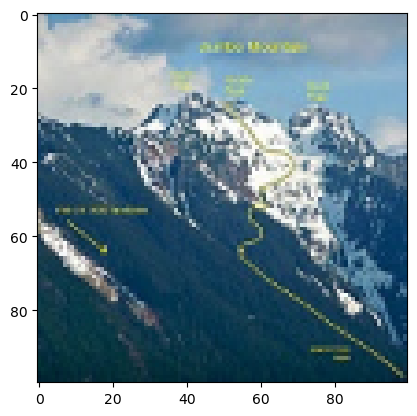

In [12]:
index = np.random.randint(X_train.shape[0])
print(class_names[y_train[index]])
plt.imshow(X_train[index]);

In [13]:
X_train_scal = X_train/255.0
X_test_scal = X_test/255.0

In [14]:
IMAGE_SIZE

(100, 100)

In [15]:
X_train_scal.shape

(14034, 100, 100, 3)

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [17]:
# Primera capa conv
# 3 porque tenemos 3 capas RGB
# 32 porque hemos elegido en esta capa de convolución hacer 32 filtros
# 3*3 porque en cada filtro tenemos una matriz de 3*3 pixeles
# 32 bias
3*32*3*3 + 32

896

In [18]:
# Segunda capa conv
# 32 porque tenemos 32 filtros en el output de la anterior capa
# 64 porque hemos elegido en esta capa de convolución hacer 64 filtros
# 3*3 porque en cada filtro tenemos una matriz de 3*3 pixeles
# 64 bias
32*64*3*3 + 64

18496

In [19]:
2304*128 + 128

295040

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 49, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 33856)             0         
                                                                 
 dense (Dense)               (None, 512)               1

In [21]:
model.compile(optimizer= 'adam', loss= "sparse_categorical_crossentropy", metrics=['accuracy'])

In [22]:
# entreno tres veces para conseguir un score > 0.8

In [23]:
history = model.fit(X_train_scal, y_train, batch_size=512, epochs=10, validation_split=0.1)

Epoch 1/10
25/25 [==============================] - 241s 10s/step - loss: 1.4662 - accuracy: 0.4647 - val_loss: 0.9340 - val_accuracy: 0.6417
Epoch 2/10
25/25 [==============================] - 245s 10s/step - loss: 0.8602 - accuracy: 0.6794 - val_loss: 0.7953 - val_accuracy: 0.6952
Epoch 3/10
25/25 [==============================] - 244s 10s/step - loss: 0.7204 - accuracy: 0.7409 - val_loss: 0.7474 - val_accuracy: 0.7222
Epoch 4/10
25/25 [==============================] - 241s 10s/step - loss: 0.5974 - accuracy: 0.7899 - val_loss: 0.6750 - val_accuracy: 0.7415
Epoch 5/10
25/25 [==============================] - 172s 7s/step - loss: 0.5002 - accuracy: 0.8284 - val_loss: 0.6545 - val_accuracy: 0.7600
Epoch 6/10
25/25 [==============================] - 170s 7s/step - loss: 0.4237 - accuracy: 0.8566 - val_loss: 0.6647 - val_accuracy: 0.7614
Epoch 7/10
25/25 [==============================] - 170s 7s/step - loss: 0.3906 - accuracy: 0.8656 - val_loss: 0.6301 - val_accuracy: 0.7714
Epoch 8/1

In [36]:
df_hist = pd.DataFrame(history.history)
df_hist

,loss,accuracy,val_loss,val_accuracy
0,1.466203,0.464687,0.933984,0.641738
1,0.860155,0.679414,0.795295,0.695157
2,0.720425,0.740934,0.747428,0.722222
3,0.597376,0.789945,0.674989,0.741453
4,0.500181,0.828424,0.654475,0.759971
5,0.423716,0.856611,0.664697,0.761396
6,0.390571,0.865558,0.630087,0.771368
7,0.300041,0.904355,0.668353,0.768519
8,0.247896,0.921536,0.619152,0.787749
9,0.183120,0.949248,0.673636,0.789886


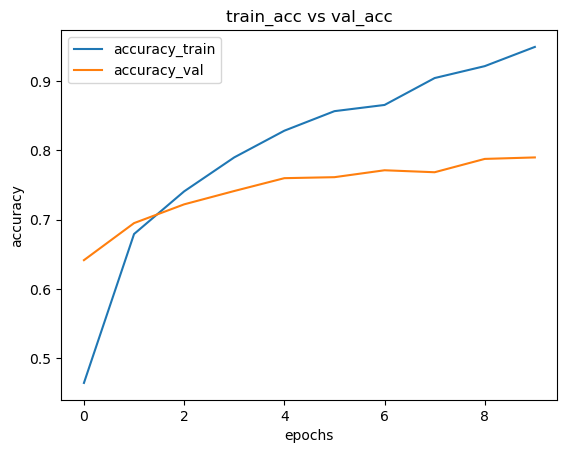

In [37]:
plt.figure()
plt.plot(df_hist['accuracy'], label="accuracy_train")
plt.plot(df_hist['val_accuracy'], label="accuracy_val")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

In [38]:
results = model.evaluate(X_test_scal, y_test)

94/94 [==============================] - 11s 117ms/step - loss: 0.6733 - accuracy: 0.7843


In [39]:
predictions = model.predict(X_test_scal)
predictions.round(2)

94/94 [==============================] - 12s 123ms/step


array([[0.  , 0.  , 0.  , 0.62, 0.37, 0.  ],
       [0.03, 0.41, 0.01, 0.49, 0.  , 0.06],
       [0.  , 0.28, 0.  , 0.72, 0.  , 0.  ],
       ...,
       [0.7 , 0.  , 0.  , 0.02, 0.27, 0.  ],
       [0.  , 0.05, 0.  , 0.93, 0.02, 0.  ],
       [0.  , 0.47, 0.  , 0.12, 0.  , 0.42]], dtype=float32)

In [40]:
pred_labels = np.argmax(predictions, axis=1)

In [41]:
pred_labels

array([3, 3, 3, ..., 0, 3, 1], dtype=int64)

buildings


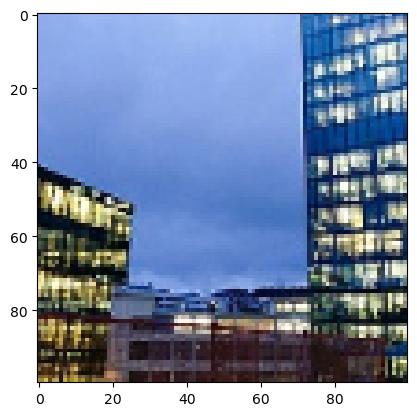

In [42]:
index=3
print(class_names[y_test[index]])
plt.imshow(X_test[index]);

In [43]:
class_names[pred_labels[index]]

'street'

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [45]:
class_names_label

{'mountain': 0,
 'street': 1,
 'glacier': 2,
 'buildings': 3,
 'sea': 4,
 'forest': 5}

In [46]:
c_mat = confusion_matrix(y_test,pred_labels)

<Axes: >

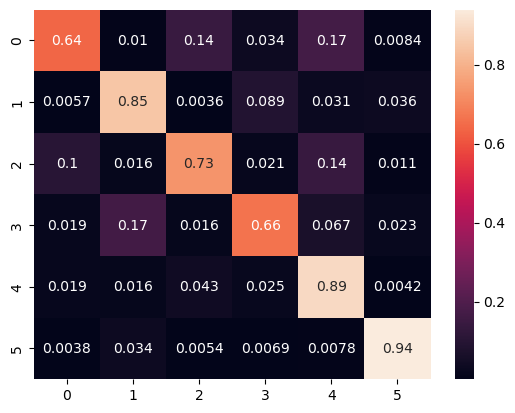

In [48]:
sns.heatmap(c_mat/np.sum(c_mat,axis=1), annot=True)